In [1]:
from bs4 import BeautifulSoup
import os
import glob
import numpy as np
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
path="Train-corups/*/*"
filenames=glob.glob(path)
print(len(filenames))

520


In [19]:
pun_dict={}
for filename in filenames:
    print(filename)
    with open(filename,encoding="ascii", errors="surrogateescape") as fp:
        soup = BeautifulSoup(fp, "lxml-xml")
    sentences=soup.find_all('s')
    for sentence in sentences:
        words=sentence.find_all('c')
        for word in words:
            w=word.get_text(strip=True)
            t=word.get('c5')
            try:
                try:
                    pun_dict[w][t] += 1
                except:
                    pun_dict[w][t] = 1
            except:
                pun_dict[w] = {t: 1} 
print(pun_dict)

Test-corpus\AN\AN0.xml
Test-corpus\AN\AN1.xml
Test-corpus\AN\AN2.xml
Test-corpus\AN\AN3.xml
Test-corpus\AN\AN4.xml
Test-corpus\AN\AN5.xml
Test-corpus\AN\AN7.xml
Test-corpus\AN\AN8.xml
Test-corpus\AN\AN9.xml
Test-corpus\AN\ANA.xml
Test-corpus\AN\ANB.xml
Test-corpus\AN\ANC.xml
Test-corpus\AN\AND.xml
Test-corpus\AN\ANF.xml
Test-corpus\AN\ANH.xml
Test-corpus\AN\ANJ.xml
Test-corpus\AN\ANK.xml
Test-corpus\AN\ANL.xml
Test-corpus\AN\ANM.xml
Test-corpus\AN\ANP.xml
Test-corpus\AN\ANR.xml
Test-corpus\AN\ANS.xml
Test-corpus\AN\ANT.xml
Test-corpus\AN\ANU.xml
Test-corpus\AN\ANX.xml
Test-corpus\AN\ANY.xml
Test-corpus\AP\AP0.xml
Test-corpus\AP\AP1.xml
Test-corpus\AP\AP5.xml
Test-corpus\AP\AP6.xml
Test-corpus\AP\AP7.xml
Test-corpus\AP\AP8.xml
Test-corpus\AP\APC.xml
Test-corpus\AP\APD.xml
Test-corpus\AP\APE.xml
Test-corpus\AP\APH.xml
Test-corpus\AP\APJ.xml
Test-corpus\AP\APK.xml
Test-corpus\AP\APL.xml
Test-corpus\AP\APM.xml
Test-corpus\AP\APN.xml
Test-corpus\AP\APP.xml
Test-corpus\AP\APR.xml
Test-corpus

KeyboardInterrupt: 

In [ ]:
pun_tags={}
for key in pun_dict.keys():
    x=0
    for tags in pun_dict[key].keys():
        if pun_dict[key].get(tags)>x:
            x=pun_dict[key].get(tags)
            pun_tags[key]=tags
print(pun_tags)

In [3]:
transition_matrix={}
tag_word_table={}
tag_tag_table={}
emission_matrix={}
for filename in filenames:
    print(filename)
    with open(filename,encoding="ascii", errors="surrogateescape") as fp:
        soup = BeautifulSoup(fp, "lxml-xml")
    sentences=soup.find_all('s')
    for sentence in sentences:
        words=sentence.find_all('w')
#         print(sentence)
        for word in words:
            w=word.get_text(strip=True)
            tags=word.get('c5')
#             print(w,tag)
            tags=tags.split('-',2)
            for tag in tags:
                try:
                    try:
                        tag_word_table[tag][w] += 1
                    except:
                        tag_word_table[tag][w] = 1
                except:
                    tag_word_table[tag] = {w: 1}
        if len(words)>0:
            tagbeg=words[0].get('c5')
            tagbeg=tagbeg.split('-',2)
            for tag0 in tagbeg:
                try:
                    try:
                        tag_tag_table["SRT"][tag0] += 1
                    except:
                        tag_tag_table["SRT"][tag0] = 1
                except:
                    tag_tag_table["SRT"] = {tag0: 1}     
            tagslast=words[len(words)-1].get('c5')
            tagslast=tagslast.split('-',2)
            for taglast in tagslast:
                try:
                    try:
                        tag_tag_table[taglast]["END"] += 1
                    except:
                        tag_tag_table[taglast]["END"] = 1
                except:
                    tag_tag_table[taglast] = {"END": 1}  
        for i in range(len(words)-1):
            tags1=words[i].get('c5')
            tags2=words[i+1].get('c5')
            tags1=tags1.split('-',2)
            tags2=tags2.split('-',2)
            for tag1 in tags1:
                for tag2 in tags2:
                    try:
                        try:
                            tag_tag_table[tag1][tag2] += 1
                        except:
                            tag_tag_table[tag1][tag2] = 1
                    except:
                        tag_tag_table[tag1] = {tag2: 1}  
#         break
#     break

Train-corups\A1\A10.xml
Train-corups\A1\A11.xml
Train-corups\A1\A12.xml
Train-corups\A1\A13.xml
Train-corups\A1\A14.xml
Train-corups\A1\A15.xml
Train-corups\A1\A16.xml
Train-corups\A1\A17.xml
Train-corups\A1\A18.xml
Train-corups\A1\A19.xml
Train-corups\A1\A1A.xml
Train-corups\A1\A1B.xml
Train-corups\A1\A1D.xml
Train-corups\A1\A1E.xml
Train-corups\A1\A1F.xml
Train-corups\A1\A1G.xml
Train-corups\A1\A1H.xml
Train-corups\A1\A1J.xml
Train-corups\A1\A1K.xml
Train-corups\A1\A1L.xml
Train-corups\A1\A1M.xml
Train-corups\A1\A1N.xml
Train-corups\A1\A1P.xml
Train-corups\A1\A1R.xml
Train-corups\A1\A1S.xml
Train-corups\A1\A1T.xml
Train-corups\A1\A1U.xml
Train-corups\A1\A1V.xml
Train-corups\A1\A1W.xml
Train-corups\A1\A1X.xml
Train-corups\A1\A1Y.xml
Train-corups\A2\A20.xml
Train-corups\A2\A21.xml
Train-corups\A2\A22.xml
Train-corups\A2\A23.xml
Train-corups\A2\A24.xml
Train-corups\A2\A25.xml
Train-corups\A2\A26.xml
Train-corups\A2\A27.xml
Train-corups\A2\A28.xml
Train-corups\A2\A29.xml
Train-corups\A2\

Train-corups\AC\ACG.xml
Train-corups\AC\ACH.xml
Train-corups\AC\ACJ.xml
Train-corups\AC\ACK.xml
Train-corups\AC\ACL.xml
Train-corups\AC\ACM.xml
Train-corups\AC\ACN.xml
Train-corups\AC\ACP.xml
Train-corups\AC\ACR.xml
Train-corups\AC\ACS.xml
Train-corups\AC\ACV.xml
Train-corups\AC\ACW.xml
Train-corups\AC\ACX.xml
Train-corups\AC\ACY.xml
Train-corups\AD\AD0.xml
Train-corups\AD\AD1.xml
Train-corups\AD\AD2.xml
Train-corups\AD\AD7.xml
Train-corups\AD\AD9.xml
Train-corups\AD\ADA.xml
Train-corups\AD\ADB.xml
Train-corups\AD\ADC.xml
Train-corups\AD\ADD.xml
Train-corups\AD\ADE.xml
Train-corups\AD\ADF.xml
Train-corups\AD\ADG.xml
Train-corups\AD\ADH.xml
Train-corups\AD\ADK.xml
Train-corups\AD\ADL.xml
Train-corups\AD\ADM.xml
Train-corups\AD\ADP.xml
Train-corups\AD\ADR.xml
Train-corups\AD\ADS.xml
Train-corups\AD\ADW.xml
Train-corups\AD\ADX.xml
Train-corups\AD\ADY.xml
Train-corups\AH\AH9.xml
Train-corups\AH\AHA.xml
Train-corups\AH\AHB.xml
Train-corups\AH\AHC.xml
Train-corups\AH\AHD.xml
Train-corups\AH\

In [4]:
print(len(tag_tag_table.keys()),len(tag_word_table.keys()))

58 57


In [5]:
for tags in tag_word_table.keys():
    total_count=sum(tag_word_table[tags].values())
    for words in tag_word_table[tags].keys():
        tag_word_table[tags][words]/=total_count
for tags in tag_tag_table.keys():
    total_count=sum(tag_tag_table[tags].values())
    for tag in tag_tag_table[tags].keys():
        tag_tag_table[tags][tag]/=total_count
print(tag_word_table)
print(tag_tag_table)
emission_matrix=tag_word_table
transition_matrix=tag_tag_table

{'NN1': {'NEWS': 2.0332099429049234e-05, 'FOCUS': 5.0830248572623085e-06, 'Age': 0.00018489502918291647, 'Concern': 0.00010356663146671954, 'House': 0.0010274063992741442, 'Tel': 6.09962982871477e-05, 'Editor': 0.0002382667901841707, 'Issue': 8.89529350020904e-06, 'month': 0.0011246192496692858, 'News': 0.00023064225289827725, 'Focus': 2.605050239346933e-05, 'Training': 0.00010166049714524617, 'Publishing': 3.1768905357889425e-05, 'design': 0.0005508728189058026, 'past': 0.0007383093605173503, 'newsletter': 1.8425965107575868e-05, 'format': 5.8454785858516546e-05, 'banner': 5.210100478693866e-05, 'Local': 6.862083557304115e-05, 'Look': 3.558117400083616e-05, 'launch': 0.00011500343739555972, 'campaign': 0.0009670454790941541, 'pack': 0.0001499492332892381, 'style': 0.0008393344795554386, 'Chairman': 0.00011373268118124414, 'Party': 0.0013730520895679811, 'Body': 6.925621368019894e-05, 'directory': 2.4779746179153752e-05, 'publication': 0.00017282284514691848, 'preparation': 0.000163292

In [6]:
# class_names=['SRT', 'NN2', 'AT0', 'NN1', 'AV0', 'PRP', 'VHZ', 'DT0', 'PRF', 'VHB', 'CRD', 'TO0', 'VVI', 'VVN', 'CJC', 'PRP-AVP', 'VVG', 'EX0', 'VBB', 'AJ0', 'AJ0-NN1', 'VVZ', 'VBZ', 'CJT', 'POS', 'PNP', 'CJS', 'DPS', 'PNQ', 'VVB', 'VVN-AJ0', 'PNI', 'DTQ', 'NN1-VVB', 'NN0', 'XX0', 'VBN', 'VVD', 'AVP', 'NP0', 'NN1-VVG', 'NN1-AJ0', 'UNC', 'VBD', 'AJ0-VVG', 'VVD-VVN', 'NN2-VVZ', 'ORD', 'AVQ-CJS', 'CJS-PRP', 'VM0', 'AJS', 'VBI', 'VVN-VVD', 'VHI', 'VDZ', 'ZZ0', 'AVP-PRP', 'AVQ', 'VVB-NN1', 'VDN', 'VDB', 'PNX', 'CJT-DT0', 'VVG-AJ0', 'VBG', 'VHG', 'VHD', 'NP0-NN1', 'ITJ', 'VVG-NN1', 'NN1-NP0', 'AJ0-VVN', 'VVZ-NN2', 'AJ0-AV0', 'AJC', 'AV0-AJ0', 'DT0-CJT', 'VDD', 'PNI-CRD', 'VHN', 'AJ0-VVD', 'PRP-CJS', 'VDI', 'CJS-AVQ', 'VVD-AJ0', 'VDG', 'CRD-PNI','END']
class_names = ['SRT','NN1', 'VVB', 'CJC', 'PRP', 'AT0', 'NP0', 
'VBZ', 'POS', 'AJ0', 'CJS', 'VHZ', 'NN2', 'VBB', 
'VVN', 'AVP', 'PRF', 'VVZ', 'AV0', 'CRD', 'DTQ', 
'ORD', 'VBD', 'DPS', 'VVD', 'NN0', 'DT0', 'VHD', 
'VBG', 'PNP', 'VVG', 'TO0', 'VVI', 'VM0', 'VBI', 
'AJC', 'VHB', 'VBN', 'CJT', 'AJS', 'VDI', 'VDZ', 
'XX0', 'AVQ', 'EX0', 'VHI', 'VDD', 'UNC', 'PNI', 
'VDB', 'VDN', 'VHG', 'ZZ0', 'PNX', 'VHN','PNQ', 'ITJ', 'VDG','END']
class_numbers={}
i=0
for tag in class_names:
    class_numbers[tag]=i
    i+=1
print(class_numbers)

{'SRT': 0, 'NN1': 1, 'VVB': 2, 'CJC': 3, 'PRP': 4, 'AT0': 5, 'NP0': 6, 'VBZ': 7, 'POS': 8, 'AJ0': 9, 'CJS': 10, 'VHZ': 11, 'NN2': 12, 'VBB': 13, 'VVN': 14, 'AVP': 15, 'PRF': 16, 'VVZ': 17, 'AV0': 18, 'CRD': 19, 'DTQ': 20, 'ORD': 21, 'VBD': 22, 'DPS': 23, 'VVD': 24, 'NN0': 25, 'DT0': 26, 'VHD': 27, 'VBG': 28, 'PNP': 29, 'VVG': 30, 'TO0': 31, 'VVI': 32, 'VM0': 33, 'VBI': 34, 'AJC': 35, 'VHB': 36, 'VBN': 37, 'CJT': 38, 'AJS': 39, 'VDI': 40, 'VDZ': 41, 'XX0': 42, 'AVQ': 43, 'EX0': 44, 'VHI': 45, 'VDD': 46, 'UNC': 47, 'PNI': 48, 'VDB': 49, 'VDN': 50, 'VHG': 51, 'ZZ0': 52, 'PNX': 53, 'VHN': 54, 'PNQ': 55, 'ITJ': 56, 'VDG': 57, 'END': 58}


In [7]:
class_size=len(class_names)
transmat=np.empty((class_size,class_size),dtype=np.float64)

In [9]:
for i in range(class_size):
    for j in range(class_size):
        try:
            transmat[i][j]=transition_matrix[class_names[i]].get(class_names[j])
        except:
            transmat[i][j]=0
        if np.isnan(transmat[i][j]):
            transmat[i][j]=0

In [48]:
print(transmat[14][15])
print(transition_matrix['VVN']['AVP'])

0.05797968947944554
0.05797968947944554


In [11]:
print(transition_matrix['NN1'].get('NN2'))

0.04874216318545944


In [12]:
print(transmat[class_numbers['NN1']][class_numbers['NN2']])

0.04874216318545944


In [13]:
path="Test-corpus/*/*"
filenames=glob.glob(path)
print(len(filenames))

115


In [18]:
node_vectors={}
node_probabilities=np.empty(class_size,dtype=np.float64)
count=0
# class_names=['SRT', 'NN2', 'AT0', 'NN1', 'AV0', 'PRP', 'VHZ', 'DT0', 'PRF', 'VHB', 'CRD', 'TO0', 'VVI', 'VVN', 'CJC', 'PRP-AVP', 'VVG', 'EX0', 'VBB', 'AJ0', 'AJ0-NN1', 'VVZ', 'VBZ', 'CJT', 'POS', 'PNP', 'CJS', 'DPS', 'PNQ', 'VVB', 'VVN-AJ0', 'PNI', 'DTQ', 'NN1-VVB', 'NN0', 'XX0', 'VBN', 'VVD', 'AVP', 'NP0', 'NN1-VVG', 'NN1-AJ0', 'UNC', 'VBD', 'AJ0-VVG', 'VVD-VVN', 'NN2-VVZ', 'ORD', 'AVQ-CJS', 'CJS-PRP', 'VM0', 'AJS', 'VBI', 'VVN-VVD', 'VHI', 'VDZ', 'ZZ0', 'AVP-PRP', 'AVQ', 'VVB-NN1', 'VDN', 'VDB', 'PNX', 'CJT-DT0', 'VVG-AJ0', 'VBG', 'VHG', 'VHD', 'NP0-NN1', 'ITJ', 'VVG-NN1', 'NN1-NP0', 'AJ0-VVN', 'VVZ-NN2', 'AJ0-AV0', 'AJC', 'AV0-AJ0', 'DT0-CJT', 'VDD', 'PNI-CRD', 'VHN', 'AJ0-VVD', 'PRP-CJS', 'VDI', 'CJS-AVQ', 'VVD-AJ0', 'VDG', 'CRD-PNI','END']
correct=0
wrong=0
checkzero=0
count1=0
index=0
correct_tags=[]
predicted_tags=[]
for filename in filenames:
    print(filename)
    with open(filename,encoding="ascii", errors="surrogateescape") as fp:
        soup = BeautifulSoup(fp, "lxml-xml")
    sentences=soup.find_all('s')
    print(len(sentences))
    for sentence in sentences:
        for tag in class_names:
            node_vectors[tag]=[]
            node_vectors[tag].append("SRT")
        words=sentence.find_all('w')
        if len(words)==0:
            continue
        w=words[0].get_text(strip=True)
        node_probabilities=transmat[0].copy()
        temp_np=node_probabilities.copy()
        temp_emission=np.empty(class_size,np.float64)
        for i in range(class_size):
            try:
                temp_emission[i]=emission_matrix[class_names[i]].get(w)
            except:
                temp_emission[i]=0.0
        temp_emission=np.nan_to_num(temp_emission)
        temp_np*=temp_emission
        if np.all((temp_np == 0))==False:
            node_probabilities=temp_np.copy()          
        node_probabilities=np.expand_dims(node_probabilities, axis=1)
        for i in range(len(words)-1):
            temp_np=node_probabilities.copy()
            temp_node_vectors=node_vectors.copy()
            w=words[i+1].get_text(strip=True)
            node_probabilities=transmat*node_probabilities
            temp_np=node_probabilities.copy()
            temp_emission=np.empty(class_size,np.float64)
            for j in range(class_size):
                try:
                    temp_emission[j]=emission_matrix[class_names[j]].get(w)
                except:
                    temp_emission[j]=0.0
            temp_emission=np.nan_to_num(temp_emission)
            temp_emission=np.expand_dims(temp_emission, axis=0)
            temp_np=node_probabilities*temp_emission
            f=np.where(~temp_np.any(axis=0))[0]
            for j in f:
                temp_np[:,j]=node_probabilities[:,j]*0.000001
            f=np.where(~temp_np.any(axis=0))[0]
            A = np.array(temp_np, dtype=float)
            maxs = np.vstack([A, np.abs(A)]).argmax(axis=0) % A.shape[0]
            node_probabilities=A[maxs, np.arange(A.shape[1])].copy()
            node_probabilities=np.expand_dims(node_probabilities, axis=1)
            f=maxs
            for j in range(class_size):
                temp_node_vectors[class_names[j]]=node_vectors[class_names[f[j]]].copy()
                temp_node_vectors[class_names[j]].append(class_names[f[j]])
            node_vectors=temp_node_vectors.copy()
        node_probabilities=node_probabilities*transmat[:,class_size-1]
        f=np.where(node_probabilities == np.amax(node_probabilities))
        besttag=class_names[f[0][0]]
        node_vectors[besttag].append(besttag)
        count+=len(words)
        for i in range(len(words)):
            t=words[i].get('c5')
            t=t.split('-',2)
            if len(t)==1:
                if t[0]==node_vectors[besttag][i+1]:
                    correct+=1
                else:
                    wrong+=1
                correct_tags.append(t[0])
                predicted_tags.append(node_vectors[besttag][i+1])
            else:
                if t[0]==node_vectors[besttag][i+1] or t[1]==node_vectors[besttag][i+1]:
                    correct+=1
                    if t[0]==node_vectors[besttag][i+1]:
                        correct_tags.append(t[0])
                    else:
                        correct_tags.append(t[1])
                else:
                    correct_tags.append(t[0])
                    wrong+=1
                predicted_tags.append(node_vectors[besttag][i+1])

print(correct,wrong)
print(correct+wrong)
print(count,count1)
print(checkzero)
print(correct/(correct+wrong))

Test-corpus\AN\AN0.xml
1454
Test-corpus\AN\AN1.xml
700
Test-corpus\AN\AN2.xml
1920
Test-corpus\AN\AN3.xml
1593
Test-corpus\AN\AN4.xml
3457
Test-corpus\AN\AN5.xml
1402
Test-corpus\AN\AN7.xml
4132
Test-corpus\AN\AN8.xml
2538
Test-corpus\AN\AN9.xml
1860
Test-corpus\AN\ANA.xml
1299
Test-corpus\AN\ANB.xml
1380
Test-corpus\AN\ANC.xml
1923
Test-corpus\AN\AND.xml
1749
Test-corpus\AN\ANF.xml
1797
Test-corpus\AN\ANH.xml
1589
Test-corpus\AN\ANJ.xml
696
Test-corpus\AN\ANK.xml
2151
Test-corpus\AN\ANL.xml
3951
Test-corpus\AN\ANM.xml
1730
Test-corpus\AN\ANP.xml
957
Test-corpus\AN\ANR.xml
1258
Test-corpus\AN\ANS.xml
1359
Test-corpus\AN\ANT.xml
1648
Test-corpus\AN\ANU.xml
1836
Test-corpus\AN\ANX.xml
2868
Test-corpus\AN\ANY.xml
2965
Test-corpus\AP\AP0.xml
1514
Test-corpus\AP\AP1.xml
1807
Test-corpus\AP\AP5.xml
1012
Test-corpus\AP\AP6.xml
139
Test-corpus\AP\AP7.xml
1725
Test-corpus\AP\AP8.xml
710
Test-corpus\AP\APC.xml
2538
Test-corpus\AP\APD.xml
1398
Test-corpus\AP\APE.xml
1436
Test-corpus\AP\APH.xml
15

In [41]:
node_vectors={}
node_probabilities=np.empty(class_size,dtype=np.float64)
count=0
# class_names=['SRT', 'NN2', 'AT0', 'NN1', 'AV0', 'PRP', 'VHZ', 'DT0', 'PRF', 'VHB', 'CRD', 'TO0', 'VVI', 'VVN', 'CJC', 'PRP-AVP', 'VVG', 'EX0', 'VBB', 'AJ0', 'AJ0-NN1', 'VVZ', 'VBZ', 'CJT', 'POS', 'PNP', 'CJS', 'DPS', 'PNQ', 'VVB', 'VVN-AJ0', 'PNI', 'DTQ', 'NN1-VVB', 'NN0', 'XX0', 'VBN', 'VVD', 'AVP', 'NP0', 'NN1-VVG', 'NN1-AJ0', 'UNC', 'VBD', 'AJ0-VVG', 'VVD-VVN', 'NN2-VVZ', 'ORD', 'AVQ-CJS', 'CJS-PRP', 'VM0', 'AJS', 'VBI', 'VVN-VVD', 'VHI', 'VDZ', 'ZZ0', 'AVP-PRP', 'AVQ', 'VVB-NN1', 'VDN', 'VDB', 'PNX', 'CJT-DT0', 'VVG-AJ0', 'VBG', 'VHG', 'VHD', 'NP0-NN1', 'ITJ', 'VVG-NN1', 'NN1-NP0', 'AJ0-VVN', 'VVZ-NN2', 'AJ0-AV0', 'AJC', 'AV0-AJ0', 'DT0-CJT', 'VDD', 'PNI-CRD', 'VHN', 'AJ0-VVD', 'PRP-CJS', 'VDI', 'CJS-AVQ', 'VVD-AJ0', 'VDG', 'CRD-PNI','END']
correct=0
wrong=0
checkzero=0
count1=0
index=0
correct_tags=[]
predicted_tags=[]
for filename in filenames:
    print(filename)
    with open(filename,encoding="ascii", errors="surrogateescape") as fp:
        soup = BeautifulSoup(fp, "lxml-xml")
    sentences=soup.find_all('s')
    print(len(sentences))
    for sentence in sentences:
        for tag in class_names:
            node_vectors[tag]=[]
            node_vectors[tag].append("SRT")
        words=sentence.find_all('w')
        if len(words)==0:
            continue
        w=words[0].get_text(strip=True)
        node_probabilities=transmat[0].copy()
        temp_np=node_probabilities.copy()
        temp_emission=np.empty(class_size,np.float64)
        for i in range(class_size):
            try:
                temp_emission[i]=emission_matrix[class_names[i]].get(w)
            except:
                temp_emission[i]=0.0
        temp_emission=np.nan_to_num(temp_emission)
        temp_np*=temp_emission
        if np.all((temp_np == 0))==False:
            node_probabilities=temp_np.copy()          
        node_probabilities=np.expand_dims(node_probabilities, axis=1)
#         print(node_probabilities.shape)
        indices_left=np.where(node_probabilities.any(axis=1))[0]
        node_probabilities=np.take(node_probabilities,indices_left,axis=0)
        for i in range(len(words)-1):
            
#             creating temp emission for multiplication
            temp_emission=np.empty(class_size,np.float64)
            for j in range(class_size):
                try:
                    temp_emission[j]=emission_matrix[class_names[j]].get(w)
                except:
                    temp_emission[j]=0.0
            temp_emission=np.nan_to_num(temp_emission)
            temp_emission=np.expand_dims(temp_emission, axis=0)
            temp_transmat=np.take(transmat,indices_left,axis=0).copy()
            
            temp_np=node_probabilities.copy()
            temp_node_vectors=node_vectors.copy()
            w=words[i+1].get_text(strip=True)
            node_probabilities=transmat*node_probabilities
            temp_np=node_probabilities.copy()

            temp_np=node_probabilities*temp_emission
            f=np.where(~temp_np.any(axis=0))[0]
            for j in f:
                temp_np[:,j]=node_probabilities[:,j]*0.000001
            f=np.where(~temp_np.any(axis=0))[0]
            A = np.array(temp_np, dtype=float)
            maxs = np.vstack([A, np.abs(A)]).argmax(axis=0) % A.shape[0]
            node_probabilities=A[maxs, np.arange(A.shape[1])].copy()
            node_probabilities=np.expand_dims(node_probabilities, axis=1)
            f=maxs
            for j in range(class_size):
                temp_node_vectors[class_names[j]]=node_vectors[class_names[f[j]]].copy()
                temp_node_vectors[class_names[j]].append(class_names[f[j]])
            node_vectors=temp_node_vectors.copy()
        node_probabilities=node_probabilities*transmat[:,class_size-1]
        f=np.where(node_probabilities == np.amax(node_probabilities))
        besttag=class_names[f[0][0]]
        node_vectors[besttag].append(besttag)
        count+=len(words)
        for i in range(len(words)):
            t=words[i].get('c5')
            t=t.split('-',2)
            if len(t)==1:
                if t[0]==node_vectors[besttag][i+1]:
                    correct+=1
                else:
                    wrong+=1
                correct_tags.append(t[0])
                predicted_tags.append(node_vectors[besttag][i+1])
            else:
                if t[0]==node_vectors[besttag][i+1] or t[1]==node_vectors[besttag][i+1]:
                    correct+=1
                    if t[0]==node_vectors[besttag][i+1]:
                        correct_tags.append(t[0])
                    else:
                        correct_tags.append(t[1])
                else:
                    correct_tags.append(t[0])
                    wrong+=1
                predicted_tags.append(node_vectors[besttag][i+1])

print(correct,wrong)
print(correct+wrong)
print(count,count1)
print(checkzero)
print(correct/(correct+wrong))

Test-corpus\AN\AN0.xml
1454
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59, 1)
(59,

KeyboardInterrupt: 

In [ ]:
correct_pun=0
wrong_pun=0
ct=correct_tags.copy()
pt=predicted_tags.copy()
for filename in filenames:
    print(filename)
    with open(filename,encoding="ascii", errors="surrogateescape") as fp:
        soup = BeautifulSoup(fp, "lxml-xml")
    sentences=soup.find_all('s')
    for sentence in sentences:
        words=sentence.find_all('c')
        for word in words:
            w=word.get_text(strip=True)
            t=word.get('c5')
            try:
                if t==pun_tags[w]:
                    correct_pun+=1
                else:
                    wrong_pun+=1
                ct.append(t)
                pt.append(pun_tags[w])
            except:
                if t=='PUN':
                    correct_pun+=1
                else:
                    wrong_pun+=1
                ct.append(t)
                pt.append('PUN')
print(correct_pun,wrong_pun)

In [ ]:
c=correct+correct_pun
w=wrong+wrong_pun
print("Accuracy = ",c/(c+w)*100,"%")
print("Words Tested = ",c+w)

print("Accuracy of punctuation tags = ",correct_pun/(correct_pun+wrong_pun))

93


c:\users\priya\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass labels=['SRT', 'NN2', 'AT0', 'NN1', 'AV0', 'PRP', 'VHZ', 'DT0', 'PRF', 'VHB', 'CRD', 'TO0', 'VVI', 'VVN', 'CJC', 'PRP-AVP', 'VVG', 'EX0', 'VBB', 'AJ0', 'AJ0-NN1', 'VVZ', 'VBZ', 'CJT', 'POS', 'PNP', 'CJS', 'DPS', 'PNQ', 'VVB', 'VVN-AJ0', 'PNI', 'DTQ', 'NN1-VVB', 'NN0', 'XX0', 'VBN', 'VVD', 'AVP', 'NP0', 'NN1-VVG', 'NN1-AJ0', 'UNC', 'VBD', 'AJ0-VVG', 'VVD-VVN', 'NN2-VVZ', 'ORD', 'AVQ-CJS', 'CJS-PRP', 'VM0', 'AJS', 'VBI', 'VVN-VVD', 'VHI', 'VDZ', 'ZZ0', 'AVP-PRP', 'AVQ', 'VVB-NN1', 'VDN', 'VDB', 'PNX', 'CJT-DT0', 'VVG-AJ0', 'VBG', 'VHG', 'VHD', 'NP0-NN1', 'ITJ', 'VVG-NN1', 'NN1-NP0', 'AJ0-VVN', 'VVZ-NN2', 'AJ0-AV0', 'AJC', 'AV0-AJ0', 'DT0-CJT', 'VDD', 'PNI-CRD', 'VHN', 'AJ0-VVD', 'PRP-CJS', 'VDI', 'CJS-AVQ', 'VVD-AJ0', 'VDG', 'CRD-PNI', 'END', 'PUN', 'PUL', 'PUQ', 'PUR'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


0.9275565959932066
0.9275565959932066
0.9275565959932066


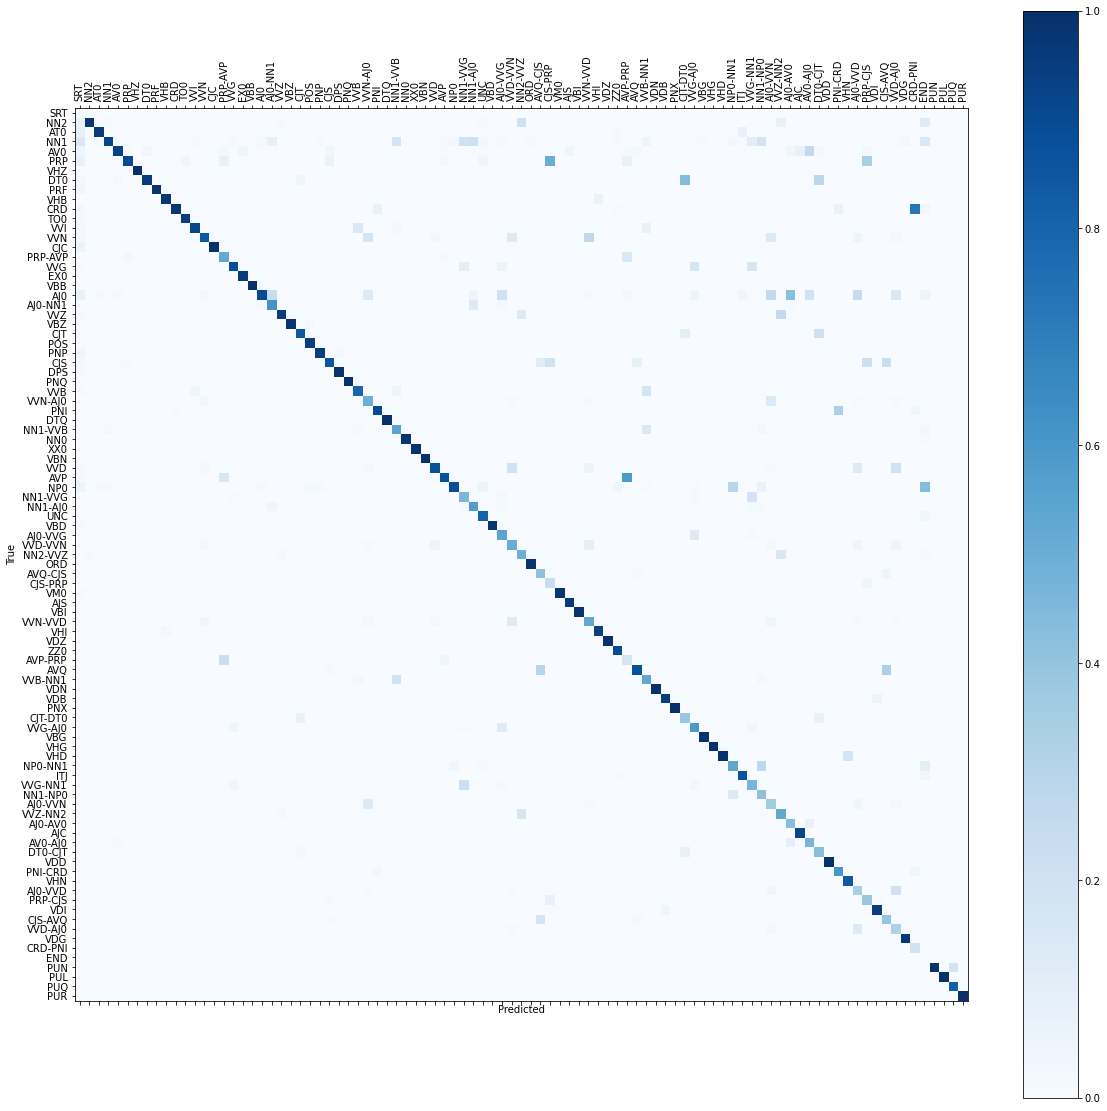

In [235]:
class_names=['SRT', 'NN2', 'AT0', 'NN1', 'AV0', 'PRP', 'VHZ', 'DT0', 'PRF', 'VHB', 'CRD', 'TO0', 'VVI', 'VVN', 'CJC', 'PRP-AVP', 'VVG', 'EX0', 'VBB', 'AJ0', 'AJ0-NN1', 'VVZ', 'VBZ', 'CJT', 'POS', 'PNP', 'CJS', 'DPS', 'PNQ', 'VVB', 'VVN-AJ0', 'PNI', 'DTQ', 'NN1-VVB', 'NN0', 'XX0', 'VBN', 'VVD', 'AVP', 'NP0', 'NN1-VVG', 'NN1-AJ0', 'UNC', 'VBD', 'AJ0-VVG', 'VVD-VVN', 'NN2-VVZ', 'ORD', 'AVQ-CJS', 'CJS-PRP', 'VM0', 'AJS', 'VBI', 'VVN-VVD', 'VHI', 'VDZ', 'ZZ0', 'AVP-PRP', 'AVQ', 'VVB-NN1', 'VDN', 'VDB', 'PNX', 'CJT-DT0', 'VVG-AJ0', 'VBG', 'VHG', 'VHD', 'NP0-NN1', 'ITJ', 'VVG-NN1', 'NN1-NP0', 'AJ0-VVN', 'VVZ-NN2', 'AJ0-AV0', 'AJC', 'AV0-AJ0', 'DT0-CJT', 'VDD', 'PNI-CRD', 'VHN', 'AJ0-VVD', 'PRP-CJS', 'VDI', 'CJS-AVQ', 'VVD-AJ0', 'VDG', 'CRD-PNI','END','PUN','PUL','PUQ','PUR']
print(len(class_names))
correct_tags=ct
predicted_tags=pt
cf = confusion_matrix(correct_tags,predicted_tags,class_names,normalize="pred")
precision = precision_score(correct_tags, predicted_tags,labels=class_names, average='micro')
recall = recall_score(correct_tags, predicted_tags,labels=class_names, average='micro')
score = f1_score(correct_tags, predicted_tags,labels=class_names, average='micro')
print(precision)
print(recall)
print(score)

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1,1,1)

# plot the matrix
cax = ax.matshow(cf,cmap="Blues")
# add colorbar for reference
fig.colorbar(cax)

ax.set_xticks(range(len(class_names)))
ax.set_yticks(range(len(class_names)))

ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

plt.xticks(rotation=90)

# add labels to plot
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("Conf_Mat.jpg")
plt.show()
# plt.savefig('cf.png')

In [ ]:
3457629 172516
3630145
3630145 0
0
0.9524768294379425

In [ ]:
485389 14352

In [20]:
print((3457629+485389)/(3630145+485389+14352))

0.9547522619268425


In [49]:
b=np.array([[0,2,0],[0,5,0],[0,8,0]])
print(b.shape)
f=np.where(~b.any(axis=0))[0]
print(f)

(3, 3)
[0 2]


In [47]:
print(b[0][1])
print(np.take(b,[1,2],axis=0))

2
[[0 5 0]
 [0 8 0]]


In [52]:
b=np.array([0,0,0,0,5,0,0,8,0])
# b=np.transpose(b)
print(b.shape)
print(b)
b=np.expand_dims(b,axis=1)
print(b)
print(b.shape)
print(b)
f=np.where(b.any(axis=1))[0]
print(f)
print(np.take(b,f,axis=0).shape)

(9,)
[0 0 0 0 5 0 0 8 0]
[[0]
 [0]
 [0]
 [0]
 [5]
 [0]
 [0]
 [8]
 [0]]
(9, 1)
[[0]
 [0]
 [0]
 [0]
 [5]
 [0]
 [0]
 [8]
 [0]]
[4 7]
(2, 1)
